In [4]:
import os 
import numpy as np
import math as m
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pathlib import Path
from PyPDF2 import PdfFileMerger
from PyPDF2 import PdfFileReader

def read_stress(arx):
        
    with open(arx+'.csv', 'r') as inp, open(arx+'.txt', 'w') as out:
        for line in inp:
            line = line.replace(',', ':')
            out.write(line)
        
    with open(arx+'.txt','r') as f:
        
        f2 = f.readlines()
        data = np.loadtxt(f2)
    
    return data

[Errno 17] File exists: 'stress_tensors/100_100_34//plots'


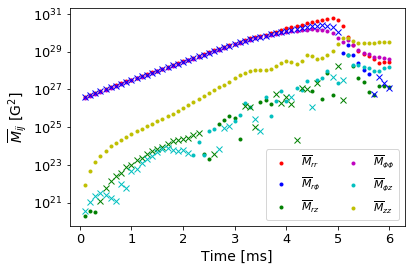

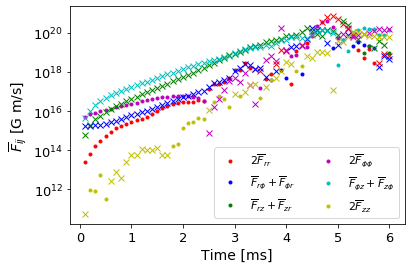

In [11]:
lenr = 100
lenphi = 100
lenz = 34
    
if lenphi == 400 :
        
    lent = 18
    t_final = 8.5
    
elif lenphi == 800 : 
        
    lent = 26
    t_final = 12.5
    
elif lenphi == 240 :
        
    lent = 61
    t_final = 30
        
elif lenphi == 100 :
    
    lent = 61
    t_final = 6

t = np.linspace(0,t_final,lent)

path = 'stress_tensors/'+str(lenr)+'_'+str(lenphi)+'_'+str(lenz)+'/'
path_plots = path+'/plots'

try:
    os.mkdir(path_plots)
except OSError as error:
    print(error)
    
Mmean_t = read_stress(path+'text_files/stress_M')
Rmean_t = read_stress(path+'text_files/stress_R')
Fmean_t = read_stress(path+'text_files/stress_F')

t_plot = np.delete(t,0)

Mmean_tplot = np.zeros((lent-1,6))
Rmean_tplot = np.zeros((lent-1,6))
Fmean_tplot = np.zeros((lent-1,9))

for x in range(0,6):
    Mmean_tplot[:,x] = np.delete(Mmean_t[:,x],0)
    Rmean_tplot[:,x] = np.delete(Rmean_t[:,x],0)
for x in range(0,9):
    Fmean_tplot[:,x] = np.delete(Fmean_t[:,x],0)

fig, ax = plt.subplots()
ax.plot(t_plot,Mmean_tplot[:,0],linestyle='None', marker='.', color ='r',label = r'$\overline{M}_{rr}$')
ax.plot(t_plot,Mmean_tplot[:,1],linestyle='None', marker='.', color ='b',label = r'$\overline{M}_{r\phi}$')
ax.plot(t_plot,Mmean_tplot[:,2],linestyle='None', marker='.', color ='g',label = r'$\overline{M}_{rz}$')
ax.plot(t_plot,Mmean_tplot[:,3],linestyle='None', marker='.', color ='m',label = r'$\overline{M}_{\phi \phi}$')
ax.plot(t_plot,Mmean_tplot[:,4],linestyle='None', marker='.', color ='c',label = r'$\overline{M}_{\phi z}$')
ax.plot(t_plot,Mmean_tplot[:,5],linestyle='None', marker='.', color ='y',label = r'$\overline{M}_{zz}$')
ax.plot(t_plot,-Mmean_tplot[:,0],linestyle='None', marker='x', color ='r')
ax.plot(t_plot,-Mmean_tplot[:,1],linestyle='None', marker='x', color ='b')
ax.plot(t_plot,-Mmean_tplot[:,2],linestyle='None', marker='x', color ='g')
ax.plot(t_plot,-Mmean_tplot[:,3],linestyle='None', marker='x', color ='m')
ax.plot(t_plot,-Mmean_tplot[:,4],linestyle='None', marker='x', color ='c')
ax.plot(t_plot,-Mmean_tplot[:,5],linestyle='None', marker='x', color ='y')
plt.yscale("log")
plt.xlabel('Time [ms]',fontsize = '14')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(r'$\overline{M}_{ij}$ $\rm{[G^2]}$', fontsize = '14')
leg = ax.legend(loc = 'lower right', ncol = 2, frameon = 'True',prop={"size":11})
plt.savefig(path_plots+'/Mmean.pdf',bbox_inches ='tight')        
plt.show()

fig, ax = plt.subplots()
ax.plot(t_plot,Rmean_tplot[:,0],linestyle='None', marker='.', color ='r',label = r'$\overline{R}_{rr}$')
ax.plot(t_plot,Rmean_tplot[:,1],linestyle='None', marker='.', color ='b',label = r'$\overline{R}_{r\phi}$')
ax.plot(t_plot,Rmean_tplot[:,2],linestyle='None', marker='.', color ='g',label = r'$\overline{R}_{rz}$')
ax.plot(t_plot,Rmean_tplot[:,3],linestyle='None', marker='.', color ='m',label = r'$\overline{R}_{\phi \phi}$')
ax.plot(t_plot,Rmean_tplot[:,4],linestyle='None', marker='.', color ='c',label = r'$\overline{R}_{\phi z}$')
ax.plot(t_plot,Rmean_tplot[:,5],linestyle='None', marker='.', color ='y',label = r'$\overline{R}_{zz}$')
ax.plot(t_plot,-Rmean_tplot[:,0],linestyle='None', marker='x', color ='r')
ax.plot(t_plot,-Rmean_tplot[:,1],linestyle='None', marker='x', color ='b')
ax.plot(t_plot,-Rmean_tplot[:,2],linestyle='None', marker='x', color ='g')
ax.plot(t_plot,-Rmean_tplot[:,3],linestyle='None', marker='x', color ='m')
ax.plot(t_plot,-Rmean_tplot[:,4],linestyle='None', marker='x', color ='c')
ax.plot(t_plot,-Rmean_tplot[:,5],linestyle='None', marker='x', color ='y')
plt.yscale("log")
plt.xlabel('Time [ms]', fontsize = '14')
plt.ylabel(r'$\overline{R}_{ij}$ [$\rm{(m/s)^2}$]', fontsize = '14')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = ax.legend(loc = 'lower right', ncol = 2, frameon = 'True',prop={"size":11})
plt.savefig(path_plots+'/Rmean.pdf',bbox_inches='tight')
plt.show() 

fig, ax = plt.subplots()
ax.plot(t_plot,2*Fmean_tplot[:,0],linestyle='None', marker='.', color ='r', label = r'$2\overline{F}_{rr}$')
ax.plot(t_plot,Fmean_tplot[:,1]+Fmean_tplot[:,6],linestyle='None', marker='.', color ='b', label = r'$\overline{F}_{r\phi}+\overline{F}_{\phi r}$')
ax.plot(t_plot,Fmean_tplot[:,2]+Fmean_tplot[:,7],linestyle='None', marker='.', color ='g', label = r'$\overline{F}_{rz}+\overline{F}_{zr}$')
ax.plot(t_plot,2*Fmean_tplot[:,3],linestyle='None', marker='.', color ='m', label = r'$2\overline{F}_{\phi\phi}$' )
ax.plot(t_plot,Fmean_tplot[:,4]+Fmean_tplot[:,8],linestyle='None', marker='.', color ='c',label = r'$\overline{F}_{\phi z}+\overline{F}_{z\phi}$')
ax.plot(t_plot,2*Fmean_tplot[:,5],linestyle='None', marker='.', color ='y', label = r'$2\overline{F}_{zz}$')
ax.plot(t_plot,-2*Fmean_tplot[:,0],linestyle='None', marker='x', color ='r')
ax.plot(t_plot,-(Fmean_tplot[:,1]+Fmean_tplot[:,6]),linestyle='None', marker='x', color ='b')
ax.plot(t_plot,-(Fmean_tplot[:,2]+Fmean_tplot[:,7]),linestyle='None', marker='x', color ='g')
ax.plot(t_plot,-2*Fmean_tplot[:,3],linestyle='None', marker='x', color ='m')
ax.plot(t_plot,-(Fmean_tplot[:,4]+Fmean_tplot[:,8]),linestyle='None', marker='x', color ='c')
ax.plot(t_plot,-2*Fmean_tplot[:,5],linestyle='None', marker='x', color ='y')

plt.yscale("log")
plt.xlabel('Time [ms]', fontsize = '14')
plt.ylabel(r'$\overline{F}_{ij}$ [G m/s]',fontsize = '14')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = ax.legend(loc = 'lower right', ncol = 2, frameon = 'True',prop={"size":11})

plt.savefig(path_plots+'/Fmean.pdf',bbox_inches='tight')
plt.show()

#merge into one file
pdf_mer = PdfFileMerger()
fig1 = PdfFileReader(path_plots+'/Mmean.pdf','rb')
fig2 = PdfFileReader(path_plots+'/Rmean.pdf','rb')
fig3 = PdfFileReader(path_plots+'/Fmean.pdf','rb')


pdf_mer.append(fig1)
pdf_mer.append(fig2)
pdf_mer.append(fig3)


with Path(path_plots+'/all_stresses.pdf').open(mode='wb') as output_file:
    pdf_mer.write(output_file)
    